Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [40]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [41]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
# Vaš kôd ovdje

𝚽 = PolynomialFeatures(1).fit_transform(X)
print(𝚽)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [44]:
from numpy import linalg

In [45]:
# Vaš kôd ovdje

#formula 𝐰=(𝚽⊺𝚽)^(−1) * 𝚽⊺𝐲

𝚽T𝚽 = matmul(𝚽.T, 𝚽)
𝚽T𝚽Inv=linalg.inv(𝚽T𝚽)
𝚽pinv = matmul(𝚽T𝚽Inv, 𝚽.T)
w=matmul(𝚽pinv, y)
print(w)

#pseudoinverz 𝐰=𝚽pinv * 𝐲

wAlternate= matmul(𝚽pinv,y)
print(wAlternate)


[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [46]:
# Vaš kôd ovdje 

from sklearn.metrics import mean_squared_error
h = np.dot(𝚽, w)

print('Primjeri iz D: \n', y)
print('Rezultati predviđanja: \n', h)

print('Pogreška prema fji sr. kvadratne vrijenosti: ', mean_squared_error(y, h))
print('Pogreška učenja prema zadanom izrazu: ', mean_squared_error(y, h) * len(X)/2)


Primjeri iz D: 
 [4 1 2 5]
Rezultati predviđanja: 
 [2.2        2.65714286 3.11428571 4.02857143]
Pogreška prema fji sr. kvadratne vrijenosti:  2.0428571428571427
Pogreška učenja prema zadanom izrazu:  4.085714285714285


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [47]:
# Vaš kôd ovdje

# rjesavanje prema 𝐰=𝚽−1𝐲 baca error jer matrica 𝚽 nije kvadratna
# wKrivo=matmul(linalg.inv(𝚽),y)

#odgovor na Q
dim = 3
𝚽dim=PolynomialFeatures(dim).fit_transform(X)
print('Matrica 𝚽 preslikana u višu dimenziju: \n', 𝚽dim)

𝚽diminv = np.linalg.inv(𝚽dim)
hD=np.dot(𝚽diminv, y)
print('Dobivena predviđanja : \n',hD)


Matrica 𝚽 preslikana u višu dimenziju: 
 [[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
Dobivena predviđanja : 
 [ 4.         -5.91666667  3.375      -0.45833333]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# Vaš kôd ovdje

regresija = LinearRegression().fit(𝚽, y)
wIntercept=regresija.intercept_
wCoef=regresija.coef_[1]
wReg=[wIntercept, wCoef]
print('w pomoću LinearRegression modela: \n w=',wReg)

hReg=regresija.predict(𝚽)
print('predikcija pomoću LinearRegression modela: \n h=', hReg)

greska=mean_squared_error(hReg, y)
print('greska predikcije lin modela: ', greska)

w pomoću LinearRegression modela: 
 w= [2.2, 0.4571428571428572]
predikcija pomoću LinearRegression modela: 
 h= [2.2        2.65714286 3.11428571 4.02857143]
greska predikcije lin modela:  2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [50]:
from numpy.random import normal

def make_labels(X, f, noise=0) :
    # Vaš kôd ovdje
    return map(lambda x : f(x) + (normal(0,noise) if noise>0 else 0), X)

In [51]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

def f(x):
    return 5+x-2*x**2-5*x**3

X2a=make_instances(-5,5,50)
Y2a=np.fromiter(make_labels(X2a, f, noise=200), float) #radi jednodim. polje iterabilnih objekata
print(Y2a)


[ 638.99227143  524.05524463 1013.93459473  258.88298711  467.23365014
  301.31371066  287.01809901 -109.3777289    96.56927473  306.57629387
 -193.15211079  259.87521211  134.64791872 -260.58452941  -69.4849419
  -83.53282118  -27.46548052 -146.61167415  104.89247541  -95.42148892
  -95.15253401 -165.57441926  129.08205922  175.69871595    1.68558883
  -80.00196366  108.37763319 -441.38891966  252.47748558  359.32941116
 -380.03236409 -308.03422359   15.77692774   81.18530312  -43.2437363
 -125.53841091   86.49160096  142.59558155   75.75626658  -86.37426755
 -317.52136183 -388.08728971 -181.83789477 -330.56964201 -539.55321674
 -737.06694681 -545.59520819 -502.65778972 -603.05643584 -637.37063625]


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

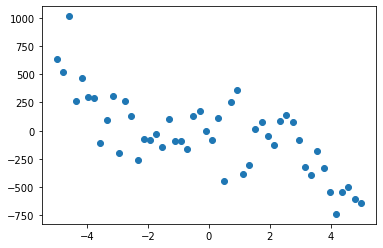

In [52]:
scatter(X2a, Y2a)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

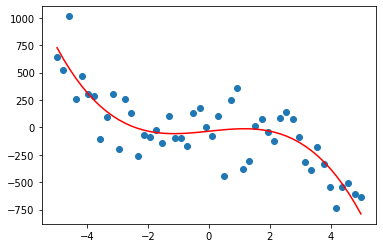

Pogreška učenja modela =  34661.23737260881


In [53]:
# Vaš kôd ovdje
d=3
polynomial= PolynomialFeatures(d);

𝚽2 = polynomial.fit_transform(X2a) 
𝚽2pinv = linalg.pinv(𝚽2)
w2 = np.matmul(𝚽2pinv,Y2a)
h2 = np.matmul(𝚽2, w2.transpose()) 

scatter(X2a,Y2a)
plt.plot(X2a,h2, 'r')
plt.show()

greska2 = mean_squared_error(Y2a, h2)
print ('Pogreška učenja modela = ',greska2)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Pogreška učenja modela za d = 1 je  55586.67751079558
Pogreška učenja modela za d = 3 je  34661.23737260881
Pogreška učenja modela za d = 5 je  33621.512710434414
Pogreška učenja modela za d = 10 je  29544.34005295428
Pogreška učenja modela za d = 20 je  25040.982508396035


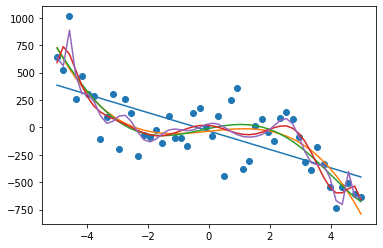

In [54]:
X3=X2a;
Y3=Y2a;

d=[1,3,5,10,20];
scatter(X3,Y3)

#colors=['r', 'g', 'p', 'b', g];

for degree in d:
    polynomial= PolynomialFeatures(degree);

    𝚽3 = polynomial.fit_transform(X3) 
    𝚽3pinv = linalg.pinv(𝚽3)
    w3 = np.matmul(𝚽3pinv,Y3)
    h3 = np.matmul(𝚽3, w3.transpose()) 
    
    plt.plot(X3,h3)

    greska3 = mean_squared_error(Y3, h3)
    print ('Pogreška učenja modela za d =', degree,'je ',greska3)




### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [55]:
from sklearn.model_selection import train_test_split

d = 1   	 greška testiranja = 77652.62827252135
d = 2   	 greška testiranja = 78362.80786123856
d = 3   	 greška testiranja = 56152.12267700267
d = 4   	 greška testiranja = 56027.56406461923
d = 5   	 greška testiranja = 64286.424292579526
d = 6   	 greška testiranja = 65127.13378026113
d = 7   	 greška testiranja = 93847.35217572156
d = 8   	 greška testiranja = 93800.84134541199
d = 9   	 greška testiranja = 85042.72793107452
d = 10   	 greška testiranja = 73225.37902670531
d = 11   	 greška testiranja = 74618.1933223147
d = 12   	 greška testiranja = 69818.4785738507
d = 13   	 greška testiranja = 74040.57613390818
d = 14   	 greška testiranja = 80292.50529245305
d = 15   	 greška testiranja = 124162.82935844324
d = 16   	 greška testiranja = 113505.45232493192
d = 17   	 greška testiranja = 1246318.5513868136
d = 18   	 greška testiranja = 1397216.7671401433
d = 19   	 greška testiranja = 4309540.365155008
d = 20   	 greška testiranja = 1311665.8900243116


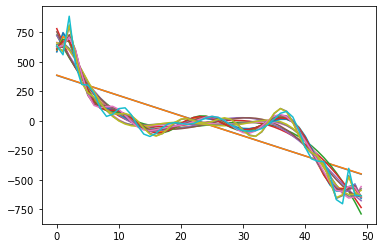

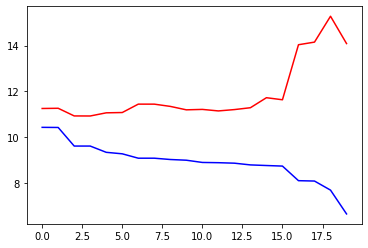

In [56]:

gTrening = []
gTest = []
model3 = LinearRegression()

for degree in range(1, 21) :
    
    polynomial = PolynomialFeatures(degree)
    𝚽3b = polynomial.fit_transform(X3)
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(𝚽3b, Y3, test_size=0.5, random_state=0)
    
    model3.fit(Xtrain, ytrain)
    
    predikcije = model3.predict(Xtrain)
    gTrening.append(mean_squared_error(ytrain, predikcije))

    predikcije = model3.predict(Xtest)
    gTest.append(mean_squared_error(ytest, predikcije))

    print('d =', degree, '  \t greška testiranja =', mean_squared_error(ytest, predikcije))  
    
    figure(1)
    model3.fit(𝚽3b, Y3)
    predictions = model3.predict(𝚽3b)
    plot(predictions)
    
    
figure(2)
plot(log(gTrening), "b")
plot(log(gTest), "r")




### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

(333, 2) (333, 1)
d = 1   	 greška testiranja = 19383.460081922094
(333, 3) (333, 1)
d = 2   	 greška testiranja = 18472.39676680302
(333, 4) (333, 1)
d = 3   	 greška testiranja = 8408.124182987509
(333, 5) (333, 1)
d = 4   	 greška testiranja = 8436.88190335536
(333, 6) (333, 1)
d = 5   	 greška testiranja = 8414.538781458501
(333, 7) (333, 1)
d = 6   	 greška testiranja = 8454.88004145305
(333, 8) (333, 1)
d = 7   	 greška testiranja = 8459.836470334523
(333, 9) (333, 1)
d = 8   	 greška testiranja = 8561.27871187163
(333, 10) (333, 1)
d = 9   	 greška testiranja = 8612.764398669882
(333, 11) (333, 1)
d = 10   	 greška testiranja = 8583.482976978466
(333, 12) (333, 1)
d = 11   	 greška testiranja = 8840.321725238857
(333, 13) (333, 1)
d = 12   	 greška testiranja = 8808.214643940622
(333, 14) (333, 1)
d = 13   	 greška testiranja = 8867.160797869885
(333, 15) (333, 1)
d = 14   	 greška testiranja = 8906.397637527645
(333, 16) (333, 1)
d = 15   	 greška testiranja = 8906.830652829085

(1000, 18) (1000, 1)
d = 17   	 greška testiranja = 45779.80615807266
(1000, 19) (1000, 1)
d = 18   	 greška testiranja = 45957.16308095561
(1000, 20) (1000, 1)
d = 19   	 greška testiranja = 46095.00887709566
(1000, 21) (1000, 1)
d = 20   	 greška testiranja = 46014.022136490166
(1000, 2) (1000, 1)
d = 1   	 greška testiranja = 260721.52943735558
(1000, 3) (1000, 1)
d = 2   	 greška testiranja = 259485.72280021204
(1000, 4) (1000, 1)
d = 3   	 greška testiranja = 248592.18829962026
(1000, 5) (1000, 1)
d = 4   	 greška testiranja = 248972.42622062404
(1000, 6) (1000, 1)
d = 5   	 greška testiranja = 249189.73331561964
(1000, 7) (1000, 1)
d = 6   	 greška testiranja = 248746.27042934537
(1000, 8) (1000, 1)
d = 7   	 greška testiranja = 248706.1289382256
(1000, 9) (1000, 1)
d = 8   	 greška testiranja = 250597.884779913
(1000, 10) (1000, 1)
d = 9   	 greška testiranja = 250425.14259982662
(1000, 11) (1000, 1)
d = 10   	 greška testiranja = 250326.52158896305
(1000, 12) (1000, 1)
d = 11  

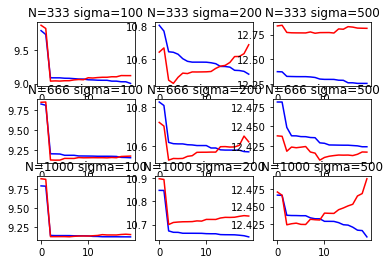

In [57]:
# Vaš kôd ovdje

def MakeLabels(X, f, noise=0) :
    if noise > 0:
        return np.array([(f(x) + np.random.normal(0, noise)) for x in X])
    return  np.array([f(x) for x in X])

fun, plots = plt.subplots(3, 3)

red=0
stupac=0

for N in [333,666,1000]:
    for sigma in [100,200,500]:  
        X3 = np.array([uniform(-5,5) for number in range(N)])
        X3.sort()
        X3 = X3.reshape(-1, 1)
        function = f
        y3 = MakeLabels(X3, function, sigma)
        
        model3c = LinearRegression()
        gTrening = []
        gTest = []
        figure(1)        
        for degree in range(1, 21):
                
            polynomial = PolynomialFeatures(degree)
            𝚽3b = polynomial.fit_transform(X3)
            print(shape(𝚽3b), shape(y3))
    
            Xtrain, Xtest, ytrain, ytest = train_test_split(𝚽3b, y3, test_size=0.5, random_state=0)
    
            model3c.fit(Xtrain, ytrain)

            predikcije = model3c.predict(Xtrain)
            gTrening.append(mean_squared_error(ytrain, predikcije))

            predikcije = model3c.predict(Xtest)
            gTest.append(mean_squared_error(ytest, predikcije))

            print('d =', degree, '  \t greška testiranja =', mean_squared_error(ytest, predikcije)) 

        plots[red,stupac].plot(log(gTrening), "b")
        plots[red,stupac].plot(log(gTest),"r")
        plots[red,stupac].set_title('N='+ str(N) + ' sigma=' + str(sigma))
        stupac+=1
        if stupac==3:
            stupac=0
            red+=1
        if red==3:
            red=0
            

plt.show()



***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [58]:
# Vaš kôd ovdje

poly = PolynomialFeatures(3)
𝚽 = poly.fit_transform(X)
print('matrica fi = ',𝚽)

𝚽T𝚽= np.dot(𝚽.transpose(), 𝚽)

I=np.identity(len(𝚽))
I[0][0] = 0

for 𝜆 in [0,1,10]:
    𝚽T𝚽inv = np.linalg.inv(𝚽T𝚽 + np.dot(𝜆, I))
    w = np.dot(𝚽T𝚽inv, 𝚽.transpose())
    w = np.dot(w, y)
    print('Za 𝜆 = ', 𝜆, 'tezine w su :', w)



matrica fi =  [[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
Za 𝜆 =  0 tezine w su : [ 4.         -5.91666667  3.375      -0.45833333]
Za 𝜆 =  1 tezine w su : [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Za 𝜆 =  10 tezine w su : [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [59]:
from sklearn.linear_model import Ridge

In [60]:
# Vaš kôd ovdje

for 𝜆 in [0,1,10]:
    𝛼=𝜆
    model4 = Ridge(𝛼)
    model4.fit(𝚽, y)
    predikcije = model4.predict(𝚽)
    gTrening = mean_squared_error(predikcije, y)
    print('za l =', 𝜆, '\t', 'w0 =', model4.intercept_, '\t', 'wi:', model4.coef_) 


za l = 0 	 w0 = 4.000000000000025 	 wi: [ 0.         -5.91666667  3.375      -0.45833333]
za l = 1 	 w0 = 3.0569614512471652 	 wi: [ 0.         -0.69079365 -0.2831746   0.1445805 ]
za l = 10 	 w0 = 2.4944418431229733 	 wi: [ 0.         -0.15897295 -0.13423067  0.0815601 ]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

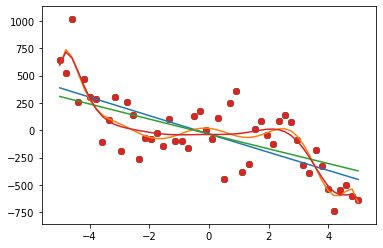

In [61]:
# Vaš kôd ovdje
from numpy.random import normal

#primjeri iz drugog zadatka
X5=X2a
Y5=Y2a

for 𝜆 in [0, 100]:
    for degree in [2, 10]:
        𝛼=𝜆
        model5 = Ridge(𝛼)
        poly = PolynomialFeatures(degree)
        𝚽 = poly.fit_transform(X5)
        model5.fit(𝚽, Y5)
        predikcije = model5.predict(𝚽)
        gTrening = mean_squared_error(predikcije, Y5)
        
        #print h fja i primjeri
        plot(X5,predikcije)
        scatter(X5, Y5)
        
                

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


𝜆 = 0   	 greška testiranja = 1312097.3316298379
𝜆 = 1   	 greška testiranja = 296483.463136646
𝜆 = 2   	 greška testiranja = 236102.12855843996
𝜆 = 3   	 greška testiranja = 205474.16583253825
𝜆 = 4   	 greška testiranja = 185806.38302933917
𝜆 = 5   	 greška testiranja = 173076.8042437645
𝜆 = 6   	 greška testiranja = 163315.09188444138
𝜆 = 7   	 greška testiranja = 156474.2533741125
𝜆 = 8   	 greška testiranja = 150676.32684389493
𝜆 = 9   	 greška testiranja = 146054.11379816587
𝜆 = 10   	 greška testiranja = 142247.88398555762
𝜆 = 11   	 greška testiranja = 138903.3731879245
𝜆 = 12   	 greška testiranja = 136271.214429623
𝜆 = 13   	 greška testiranja = 133873.6888017029
𝜆 = 14   	 greška testiranja = 131821.13685867298
𝜆 = 15   	 greška testiranja = 130035.13191237075
𝜆 = 16   	 greška testiranja = 128295.45818207454
𝜆 = 17   	 greška testiranja = 126827.42518223837
𝜆 = 18   	 greška testiranja = 125542.66711497125
𝜆 = 19   	 greška testiranja = 124337.55835500035
𝜆 = 20   	 greška 

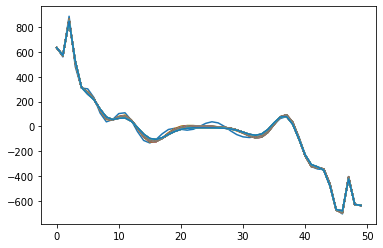

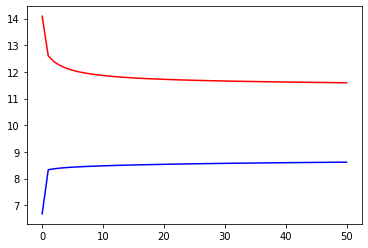

In [62]:
# Vaš kôd ovdje
X3=X2a;
Y3=Y2a;

gTrening = []
gTest = []
degree=20
polynomial = PolynomialFeatures(degree)
𝚽 = polynomial.fit_transform(X3)

for 𝜆  in range(0, 51) :
    
    𝛼=𝜆
    model5b = Ridge(𝛼) 
    Xtrain, Xtest, ytrain, ytest = train_test_split(𝚽, Y3, test_size=0.5, random_state=0)
    
    model5b.fit(Xtrain, ytrain)
    
    predikcije = model5b.predict(Xtrain)
    gTrening.append(mean_squared_error(ytrain, predikcije))

    predikcije = model5b.predict(Xtest)
    gTest.append(mean_squared_error(ytest, predikcije))

    print('𝜆 =', 𝜆, '  \t greška testiranja =', mean_squared_error(ytest, predikcije))  
    
    figure(1)
    model5b.fit(𝚽, Y3)
    predictions = model5b.predict(𝚽)
    plot(predictions)
    
    
figure(2)
plot(log(gTrening), "b")
plot(log(gTest), "r")


### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [63]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

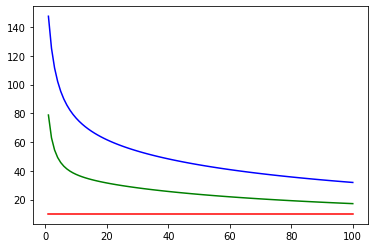

In [64]:
# Vaš kôd ovdje
degree = 10
polynomial = PolynomialFeatures(degree)
𝚽 = polynomial.fit_transform(X3)
Xtrain, Xtest, ytrain, ytest = train_test_split(𝚽, Y3, test_size=0.5, random_state=0)

L0 = np.zeros(100)
L1 = np.zeros(100)
L2 = np.zeros(100)

for 𝜆 in range(1,101):
    𝛼=𝜆    
    model6 = Ridge(𝛼)
    model6.fit(Xtrain, ytrain)
    w = model6.coef_
    L0[𝜆-1] = nonzeroes(w)
    L1[𝜆-1] = norm(w,1)
    L2[𝜆-1] = norm(w,2)
   
plt.plot(range(1,101), L0, "r")
plt.plot(range(1,101), L1, "b") 
plt.plot(range(1,101), L2, "g")


### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

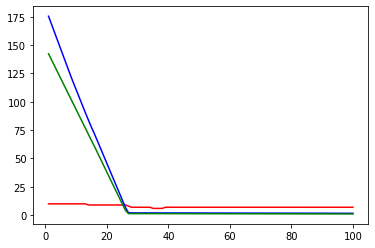

In [65]:
# Vaš kôd ovdje
from sklearn.linear_model import Lasso

degree = 10
polynomial = PolynomialFeatures(degree)
𝚽 = polynomial.fit_transform(X3)
Xtrain, Xtest, ytrain, ytest = train_test_split(𝚽, Y3, test_size=0.5, random_state=0)

L0 = np.zeros(100)
L1 = np.zeros(100)
L2 = np.zeros(100)

for 𝜆 in range(1,101):
    𝛼=𝜆    
    model6 = Lasso(𝛼)
    modelReg=model6.fit(Xtrain, ytrain)
    w = modelReg.coef_
    L0[𝜆-1] = nonzeroes(w)
    L1[𝜆-1] = norm(w,1)
    L2[𝜆-1] = norm(w,2)
   
plt.plot(range(1,101), L0, "r")
plt.plot(range(1,101), L1, "b") 
plt.plot(range(1,101), L2, "g")


### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [66]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

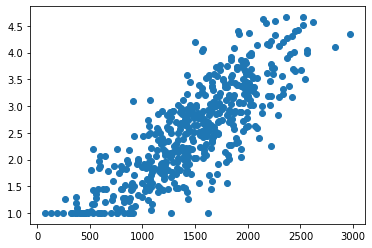

In [67]:
# Vaš kôd ovdje
plt.scatter(exam_score, grades_y)



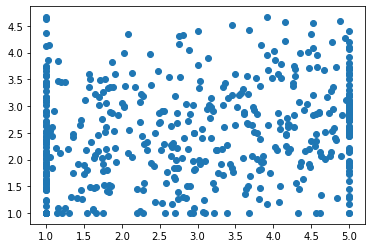

In [68]:
plt.scatter(grade_in_highschool, grades_y)

**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [69]:
# Vaš kôd ovdje
𝜆=0.01
𝛼=𝜆   
model = Ridge(𝛼)
model.fit(grades_X, grades_y)
w0 = model.intercept_
wi = model.coef_
print('w0 = ', w0, '\twi = ', wi)


w0 =  0.15061179575776018 	wi =  [0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [70]:
from sklearn.preprocessing import StandardScaler

In [80]:
# Vaš kôd ovdje
scale = StandardScaler()
grades_X_fixed = scale.fit_transform(grades_X)
grades_y_fixed = scale.fit_transform(grades_y.reshape(-1,1))


𝜆=0.01
𝛼=𝜆   
model = Ridge(𝛼)
model.fit(grades_X_fixed, grades_y_fixed)
#model.fit(grades_X_fixed, grades_y)

w0 = model.intercept_
wi = model.coef_
print('w0 = ', w0, '\twi = ', wi)

w0 =  [8.62551331e-17] 	wi =  [[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [72]:
# Vaš kôd ovdje
grades_X_fixed_colinear=np.hstack((grades_X_fixed, np.tile(grades_X_fixed[:, [-1]], 1)))
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [73]:
# Vaš kôd ovdje
𝜆=0.01
𝛼=𝜆   
model8 = Ridge(𝛼)
model8.fit(grades_X_fixed_colinear, grades_y_fixed)
w0 = model8.intercept_
wi = model8.coef_
print('w0 = ', w0, '\twi = ', wi)

w0 =  [8.6255971e-17] 	wi =  [[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [86]:
# Vaš kôd ovdje

n=len(grades_y)/2
tezine1=[]
tezine2=[]

w11=[]
w12=[]
w13=[]

w21=[]
w22=[]
w23=[]

y_resh=grades_y_fixed.ravel()

for i in range(1, 11):
    
    index = np.random.choice(grades_X_fixed_colinear.shape[0], round(n), replace=False) 
    x_random = grades_X_fixed_colinear[index]
    
    y_random = y_resh[index]
    
    model1 = Ridge(0.01)
    model1.fit(x_random, y_random)
    model2 = Ridge(1000)
    model2.fit(x_random, y_random)
    tezine1.append(model1.coef_)
    tezine2.append(model2.coef_)
    
    w11.append(model1.coef_[0])
    w12.append(model1.coef_[1])
    w13.append(model1.coef_[2])
    
    w21.append(model2.coef_[0])
    w22.append(model2.coef_[1])
    w23.append(model2.coef_[2])

    print('i =', i, '\nza 𝜆 = 0.01 => wi =', model1.coef_,  '\tza 𝜆 = 1000 => wi =', model2.coef_),

print()
print('standardne devijacije za 𝜆 = 0.01 :\n', np.std(w11), np.std(w12), np.std(w13))
print()
print('standardne devijacije za 𝜆 = 1000 :\n', np.std(w21), np.std(w22), np.std(w23))

    
    #sest tezina za dvije lambde i tri tezine
    
    


i = 1 
za 𝜆 = 0.01 => wi = [0.85218468 0.07143648 0.07143648] 	za 𝜆 = 1000 => wi = [0.16438262 0.02928095 0.02928095]
i = 2 
za 𝜆 = 0.01 => wi = [0.82379539 0.07266342 0.07266342] 	za 𝜆 = 1000 => wi = [0.17254636 0.02916032 0.02916032]
i = 3 
za 𝜆 = 0.01 => wi = [0.83680107 0.08883276 0.08883276] 	za 𝜆 = 1000 => wi = [0.16172126 0.04199653 0.04199653]
i = 4 
za 𝜆 = 0.01 => wi = [0.81034512 0.06146601 0.06146601] 	za 𝜆 = 1000 => wi = [0.17334407 0.03786333 0.03786333]
i = 5 
za 𝜆 = 0.01 => wi = [0.84312793 0.0746864  0.0746864 ] 	za 𝜆 = 1000 => wi = [0.15807199 0.02918321 0.02918321]
i = 6 
za 𝜆 = 0.01 => wi = [0.77403941 0.0779534  0.0779534 ] 	za 𝜆 = 1000 => wi = [0.1621132  0.03381768 0.03381768]
i = 7 
za 𝜆 = 0.01 => wi = [0.79996289 0.08608997 0.08608997] 	za 𝜆 = 1000 => wi = [0.17251522 0.039718   0.039718  ]
i = 8 
za 𝜆 = 0.01 => wi = [0.81392794 0.08398315 0.08398315] 	za 𝜆 = 1000 => wi = [0.16177778 0.03757547 0.03757547]
i = 9 
za 𝜆 = 0.01 => wi = [0.80058186 0.08277368 0.0827

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [ ]:
# Vaš kôd ovdje

𝚽T = grades_X_fixed_colinear.transpose()
𝚽T𝚽 = np.dot(𝚽T, grades_X_fixed_colinear)

I = np.eye(len(𝚽T𝚽))
𝜆=0.01
print('za 𝜆 =', 𝜆, '\t kondicijski broj matrice : ', np.linalg.cond(𝚽T𝚽 + np.dot(𝜆, I)))
𝜆=10
print('za 𝜆 =', 𝜆, '\t kondicijski broj matrice : ', np.linalg.cond(𝚽T𝚽 + np.dot(𝜆, I)))


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  